# 1. Setups

## 1.1. Importing Packages

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

#Local import
import vmi
print('Version: ', vmi.__version__)

# Setting image parameters
mpl.rcParams['figure.dpi'] = 90
mpl.rcParams['figure.figsize'] = [8.0, 6.0]

Version:  0.1.0


## 1.2. Loading Data

In [8]:
data = np.load('data.npy')

psf = np.loadtxt('psfd3.txt')

v = vmi.VMI(data, center=None, radious=921) 

## 1.3 Presenting Raw Data

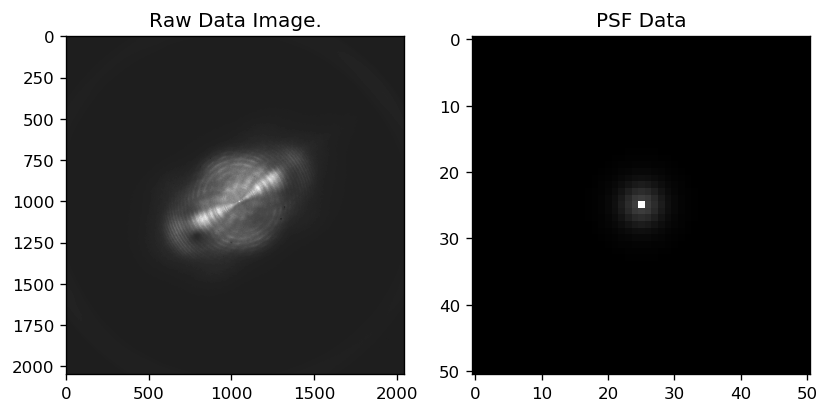

In [14]:
fig, ax = plt.subplots(1,2, dpi = 120)

ax[0].imshow(data, cmap = 'gray')
ax[0].set_title('Raw Data Image.')
ax[1].imshow(psf, cmap = 'gray')
ax[1].set_title('PSF Data')

plt.show()

# 2. Prepareing Data

## 2.1. Deconvolution 

In [10]:
v.deconv(psf=psf, iter = 5)

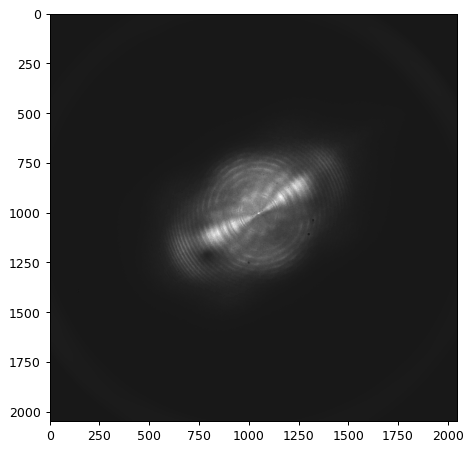

In [11]:
v.show()

## 2.2. Rotate

In [15]:
v.rotate(60)

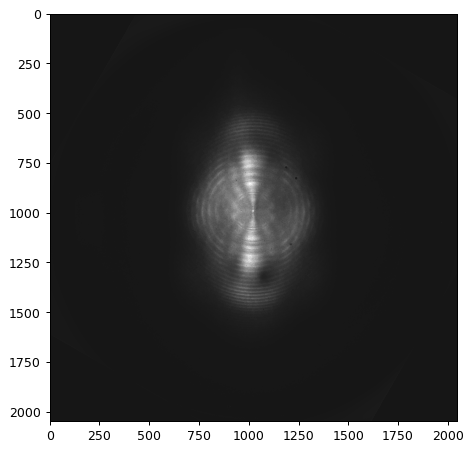

In [16]:
v.show()

## 2.3 Find Image Center

<IPython.core.display.Javascript object>


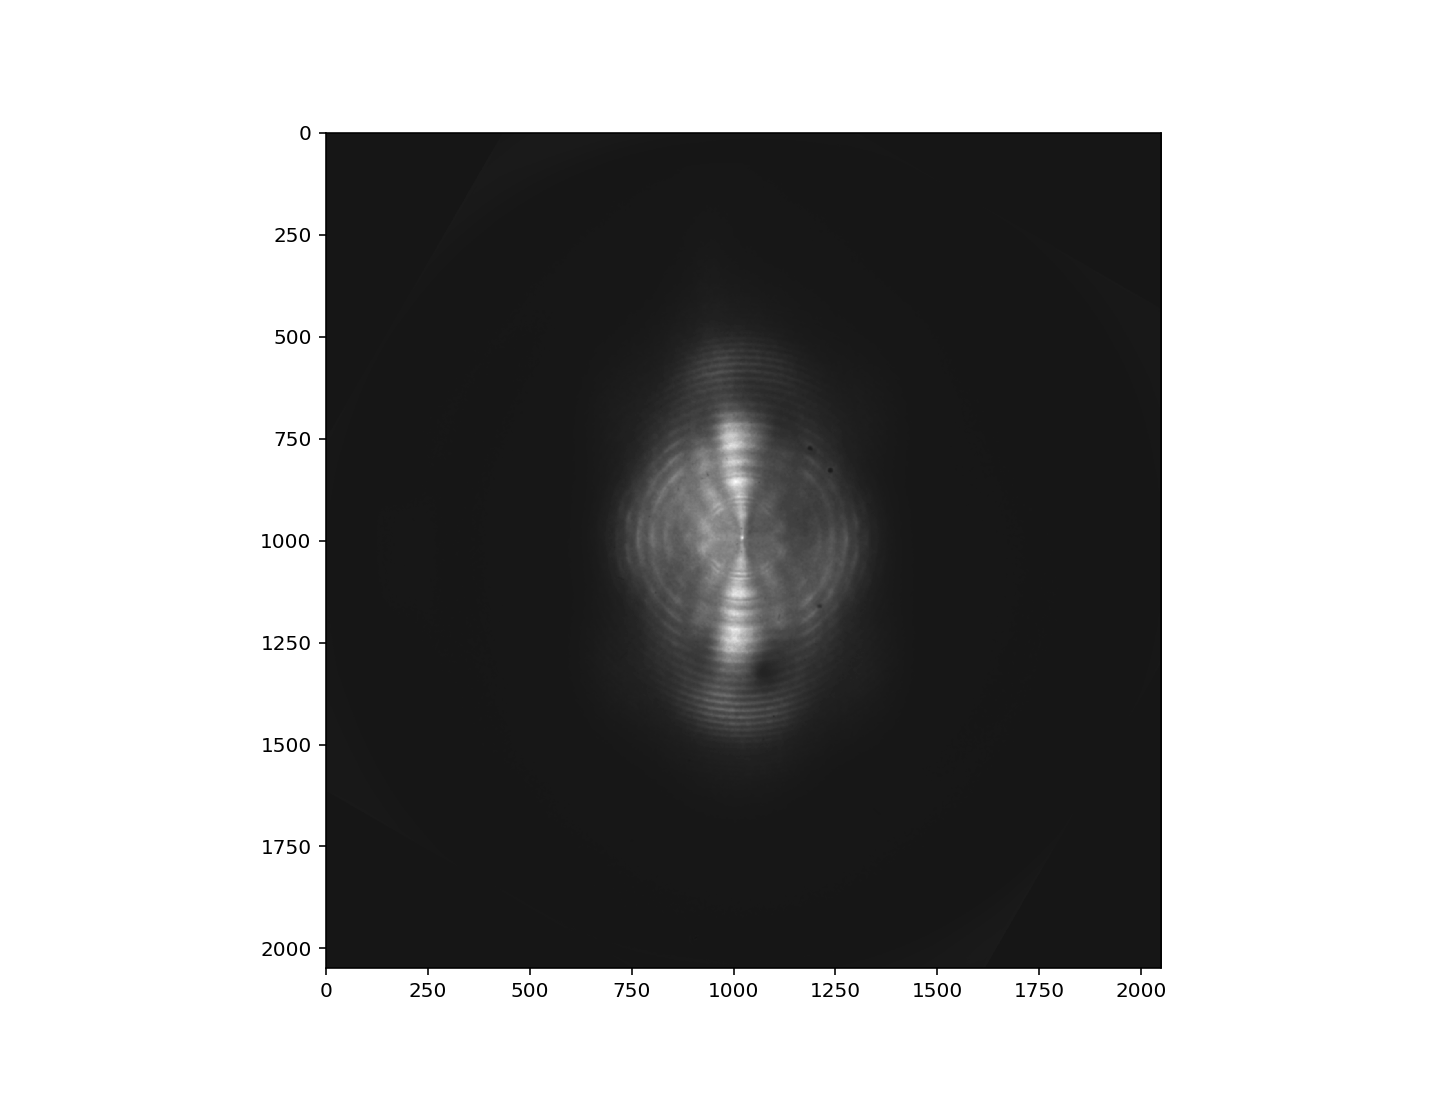

In [20]:
%matplotlib notebook
v.show()

In [21]:
v.center = [993,1019]   # [y, x]

## 2.4. Crope

In [22]:
v.crop()

## 2.5. Truncate

In [23]:
v.truncate()

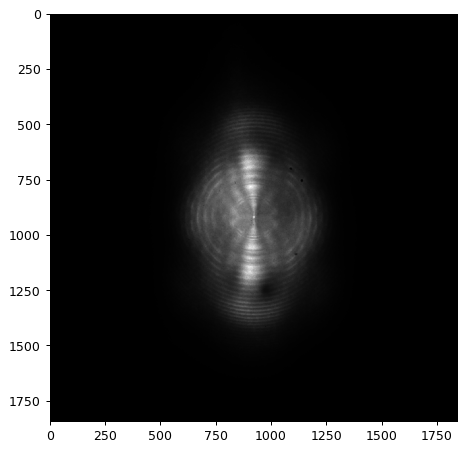

In [36]:
#%matplotlib inline
v.show()

# 3. Filter the Data

## 3.1. DarkSpot Filter

In [37]:
# Save the current data incase it is damaged
v.put_copy(copy = v.data, copy_name='befor filter')

bef_filt = v.data.copy()

In [38]:
v.data = bef_filt.copy()  #incause this cell is run again
v.darkspot_filter(
            darkspot_r=400,
            blur_size=(11, 11),
            threshold=0.85,
            gaussian_threshold=0.15,
            rotation_angle=3.5,
            iterations=5,
                    )

C:\Users\aziz_\OneDrive - The Ohio State University\Research\VMI and ATI\code\VMI\image.py:46: RuntimeWarning: invalid value encountered in true_divide
  ratio = data_focus / data_focus_blu


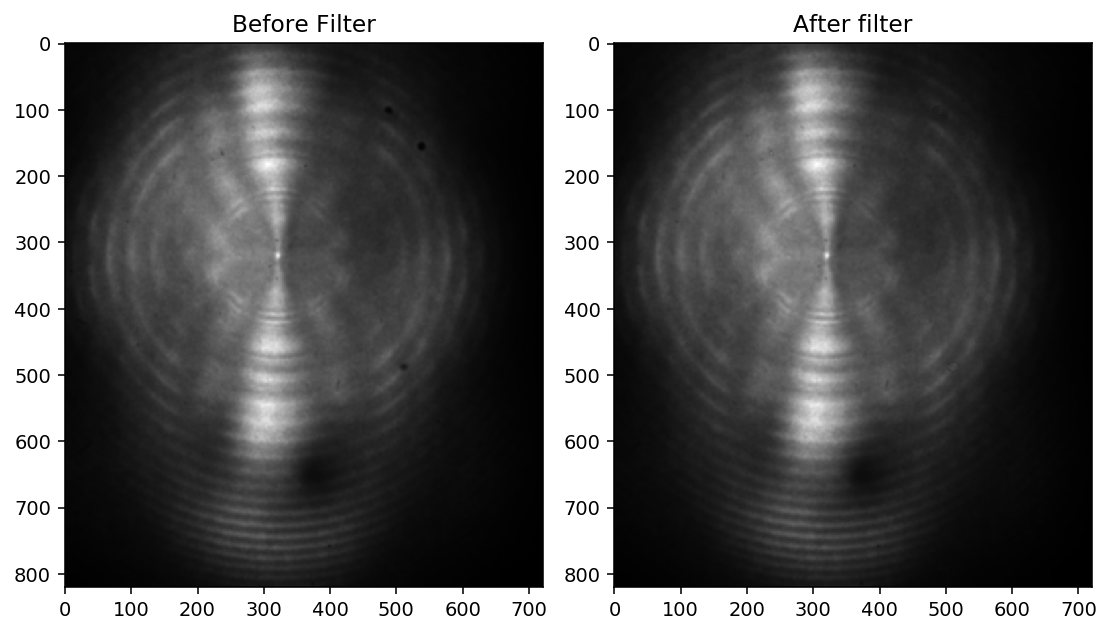

In [41]:
#%matplotlib notebook
fig, ax = plt.subplots(1,2, dpi = 140)
ax[0].imshow(bef_filt[600: 921+500, 600: 921+400], cmap = 'gray')
ax[0].set_title('Before Filter')

ax[1].imshow(v.data[600: 921+500, 600: 921+400], cmap = 'gray')
ax[1].set_title('After filter')
plt.tight_layout()
plt.show()

## 3.2. Averaging Qurdants

In [42]:
v.get_image_quadrants(symmetry_axis=(0,1), use_quadrants=[True, True, True, False]) # Here we average along the first 3 quadrants
v.put_image_quadrants(v.quadrants, symmetry_axis=(0,1))

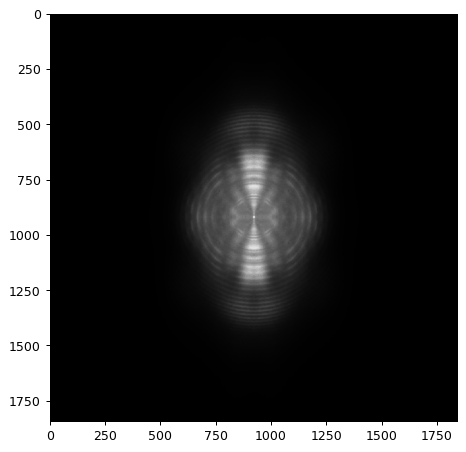

In [54]:
#%matplotlib inline
v.put_copy(copy = v.data, copy_name='clean image')
v.show()

# 4. Calculations

## 4.1. Abel Transformation

In [55]:
v.basex_transform()

Loading basis sets...
Cached basis file incompatible.
A suitable basis set was not found.
A new basis set will be generated.
This may take a few minutes.
But don't worry, it will be saved to disk for future use.
Generating horizontal BASEX basis sets for n = 922, sigma = 1.0 (nbf = 922):
k = 0...50...100...150...200...250...300...350...400...450...500...550...600...650...700...750...800...850...900...922
Basis set saved for later use to
  basex_basis_922_1.0.npy
Updating regularization...
Calculating correction...
Using memory-cached basis sets
Using memory-cached basis sets
Using memory-cached basis sets


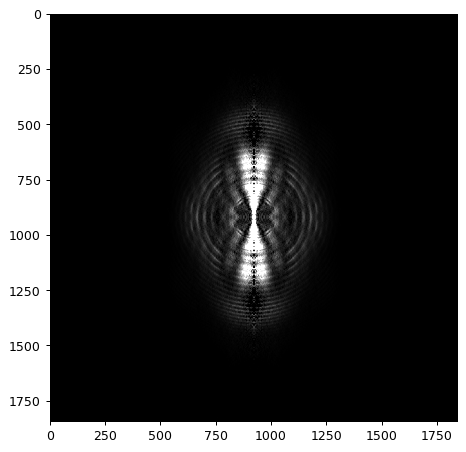

In [62]:
v.show(vmin = 100, vmax = 20000)

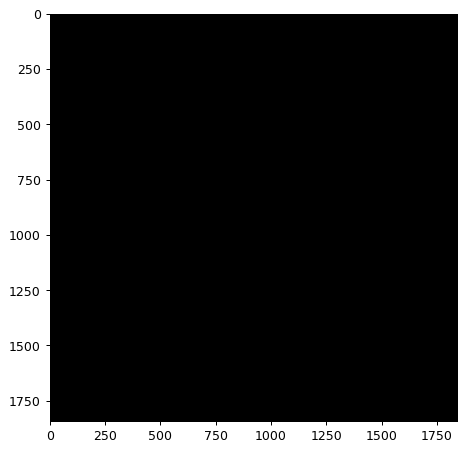

In [71]:
# Check if there are some values below zero
plt.imshow(v.data<0, cmap = 'gray')
# If yes, set them to zero
v.data = np.where(v.data<0, 0, v.data)

## 4.2. Reproject Image to Polar Cordinate

In [72]:
v.to_polar(Jacobian=True, dr=1, dt=None)

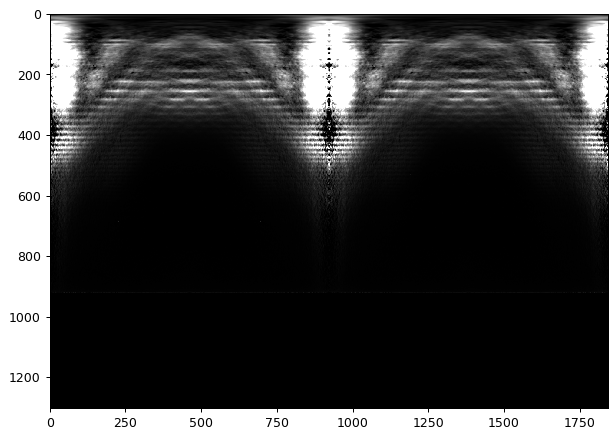

In [73]:
plt.imshow(v.polar_data, cmap = 'gray', vmin = 100, vmax = 2000000)
plt.show()

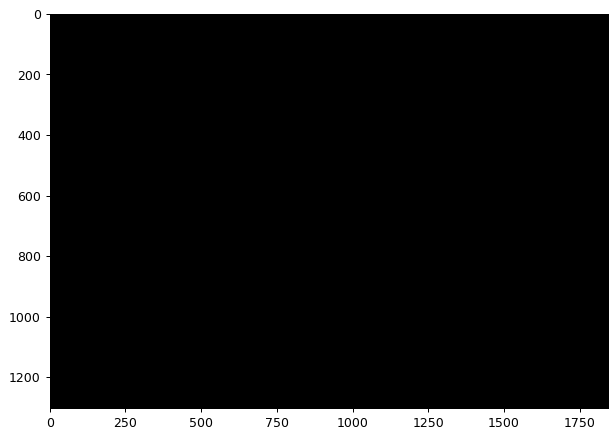

In [76]:
# Check if Polar_data has vlues less than zeros
plt.imshow(v.polar_data<0, cmap = 'gray')
# If yes, Set them to Zero
v.polar_data = np.where(v.polar_data<0, 0, v.polar_data)

## 4.3. Calculate the Electron Counts

In [77]:
v.electron_count(
                angles=range(0, 91, 15), 
                dt=3
                    )

## 4.4. Energy Calibration

# 5. Results

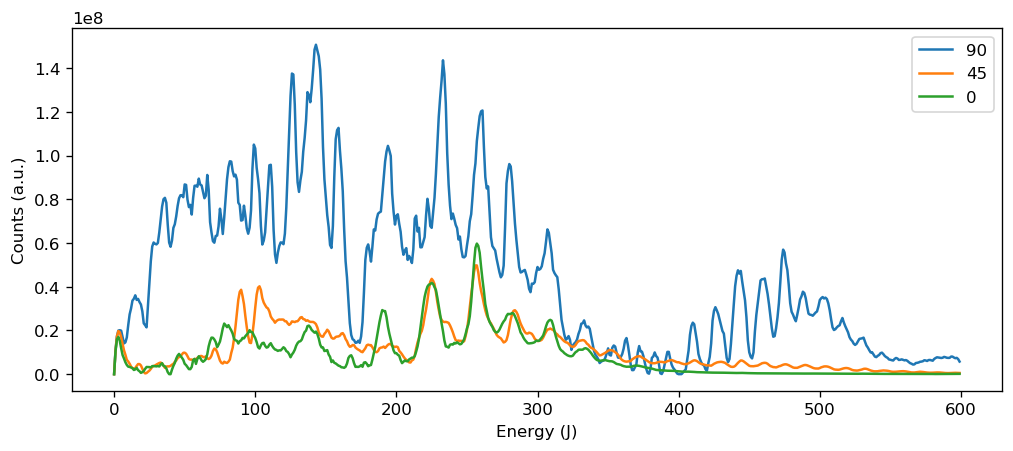

In [78]:
#%matplotlib inline
f, ax = plt.subplots(1,1, dpi = 120, figsize = [10,4])

v.plot_electron_count_vs_energy(
                              xi=0 ,
                              xf=600 ,
                              chose=[0,3,-1],
                                )
plt.show()

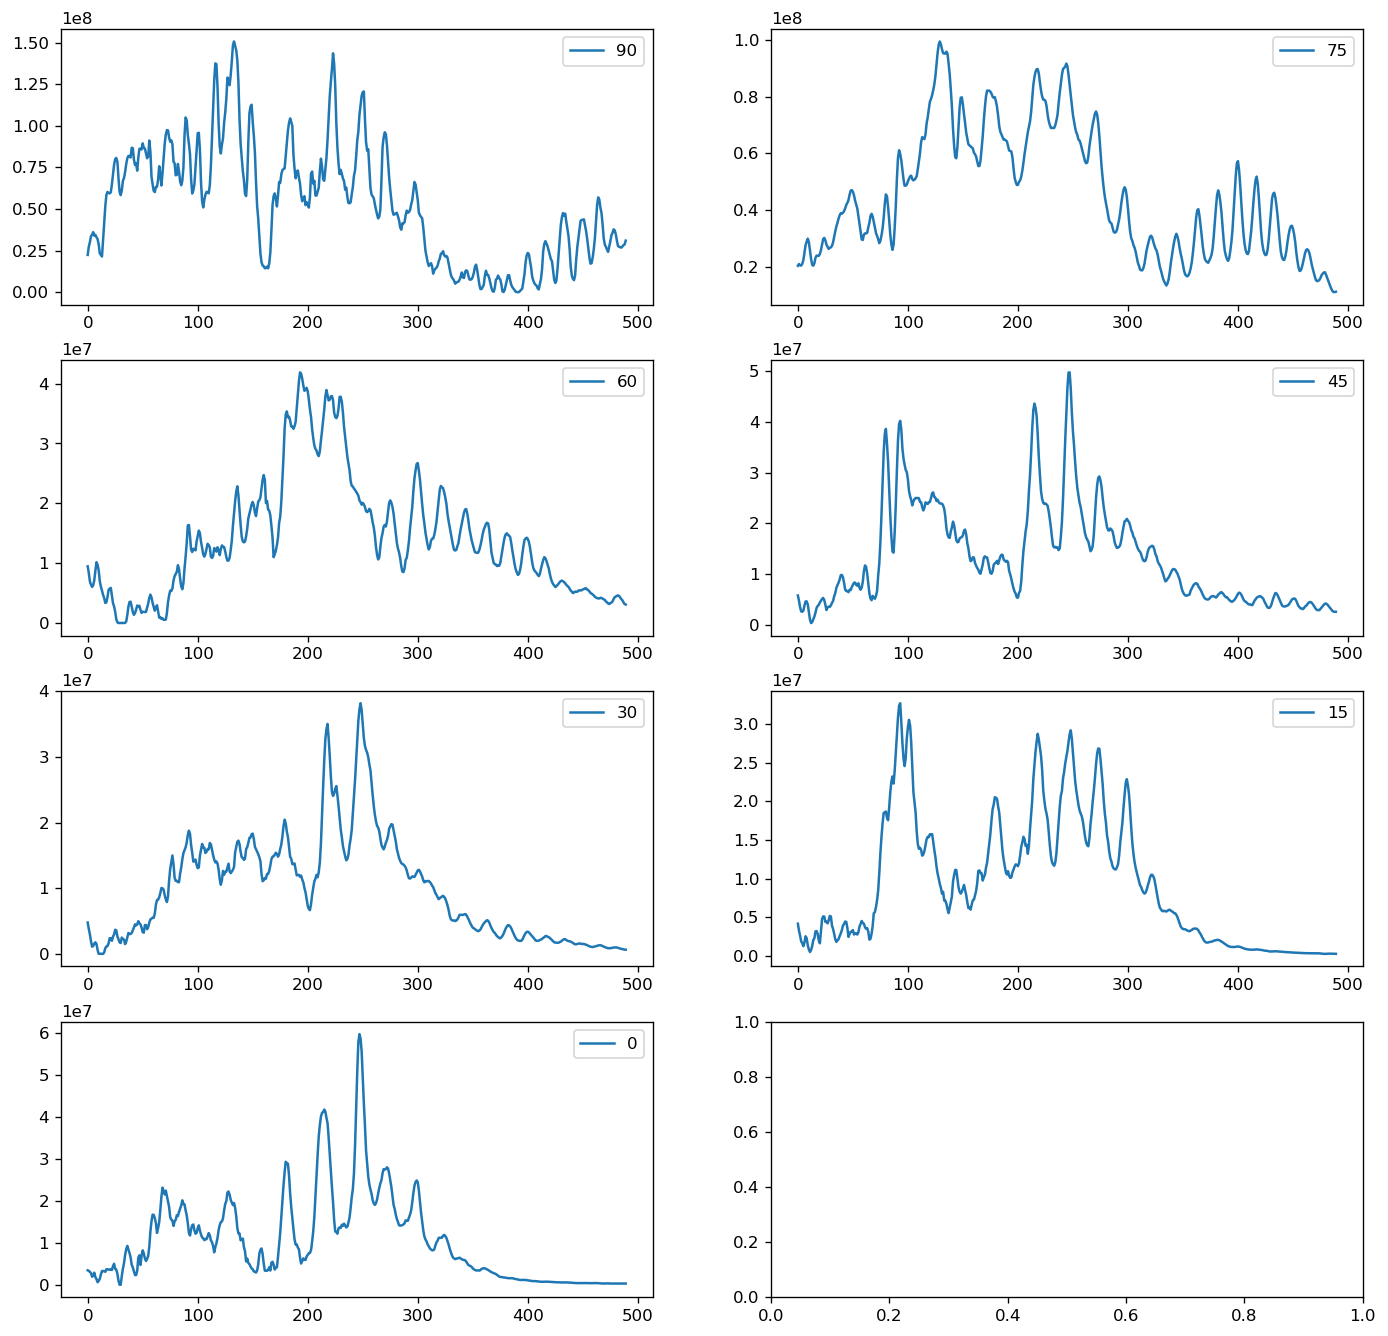

In [79]:
v.plot_sep_electron_count(dpi = 120, figsize=[14,14])

(10000.0, 1000000000.0)

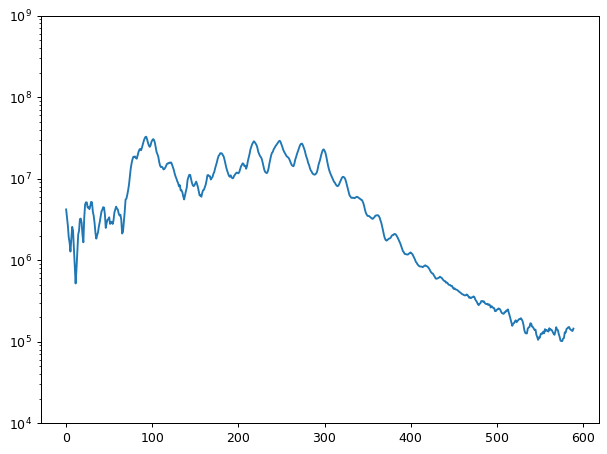

In [92]:
#plt.figure(dpi = 160)
plt.plot(v.lines[10:600,[-2]])
plt.yscale('log')
plt.ylim(1e4,1e9)